# Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

-Classification dataset information

-The raw data contains 7043 rows (customers) and 21 columns (features).

https://www.kaggle.com/blastchar/telco-customer-churn

-Objective: Predict behavior to retain customers.

-Churn: Customers who left within the last month

-Phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies: Services that each customer has signed up for

-Contract, payment method, paperless billing, monthly charges, and total charges: Customer account information

-Gender, age range, and if they have partners and dependents: Demographic

# Read Data

In [2]:
df_churn = pd.read_csv('Telco_Customer_Churn.csv')
df_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Randomly assign missing value

In [3]:
mask = np.random.choice([True, False], size = df_churn.shape, p=[.05,.95])

df_churn = df_churn.mask(mask)

df_churn.info()
df_churn.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6717 non-null object
gender              6725 non-null object
SeniorCitizen       6700 non-null float64
Partner             6688 non-null object
Dependents          6711 non-null object
tenure              6655 non-null float64
PhoneService        6667 non-null object
MultipleLines       6684 non-null object
InternetService     6666 non-null object
OnlineSecurity      6697 non-null object
OnlineBackup        6708 non-null object
DeviceProtection    6697 non-null object
TechSupport         6728 non-null object
StreamingTV         6681 non-null object
StreamingMovies     6698 non-null object
Contract            6701 non-null object
PaperlessBilling    6695 non-null object
PaymentMethod       6689 non-null object
MonthlyCharges      6671 non-null float64
TotalCharges        6710 non-null object
Churn               6689 non-null object
dtypes: float64(3), object(18

7326

In [4]:
df_churn.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,NaN,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,NaN,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,NaN,0.0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,NaN,No,Bank transfer (automatic),56.15,3487.95,No


# Preprocessing

### Replace spaces with N/A

In [5]:
df_churn['TotalCharges'] = df_churn["TotalCharges"].replace(" ",np.nan)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6717 non-null object
gender              6725 non-null object
SeniorCitizen       6700 non-null float64
Partner             6688 non-null object
Dependents          6711 non-null object
tenure              6655 non-null float64
PhoneService        6667 non-null object
MultipleLines       6684 non-null object
InternetService     6666 non-null object
OnlineSecurity      6697 non-null object
OnlineBackup        6708 non-null object
DeviceProtection    6697 non-null object
TechSupport         6728 non-null object
StreamingTV         6681 non-null object
StreamingMovies     6698 non-null object
Contract            6701 non-null object
PaperlessBilling    6695 non-null object
PaymentMethod       6689 non-null object
MonthlyCharges      6671 non-null float64
TotalCharges        6700 non-null object
Churn               6689 non-null object
dtypes: float64(3), object(18

### Correct data type

In [6]:
df_churn["TotalCharges"] = df_churn["TotalCharges"].astype(float)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6717 non-null object
gender              6725 non-null object
SeniorCitizen       6700 non-null float64
Partner             6688 non-null object
Dependents          6711 non-null object
tenure              6655 non-null float64
PhoneService        6667 non-null object
MultipleLines       6684 non-null object
InternetService     6666 non-null object
OnlineSecurity      6697 non-null object
OnlineBackup        6708 non-null object
DeviceProtection    6697 non-null object
TechSupport         6728 non-null object
StreamingTV         6681 non-null object
StreamingMovies     6698 non-null object
Contract            6701 non-null object
PaperlessBilling    6695 non-null object
PaymentMethod       6689 non-null object
MonthlyCharges      6671 non-null float64
TotalCharges        6700 non-null float64
Churn               6689 non-null object
dtypes: float64(4), object(1

### Impute value for missing data

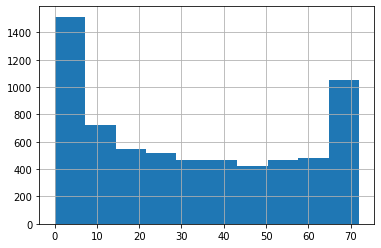

In [7]:
df_churn['tenure'].hist()

Based on data distribution, used mean to impute missing value.

In [8]:
imp_tenure = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_churn['tenure'] = imp_tenure.fit_transform(df_churn[["tenure"]]).ravel()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


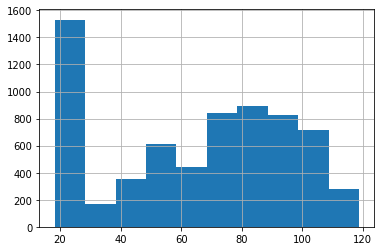

In [9]:
df_churn['MonthlyCharges'].hist()

In [10]:
imp_MonthlyCharges = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_churn['MonthlyCharges'] = imp_MonthlyCharges.fit_transform(df_churn[["MonthlyCharges"]]).ravel()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


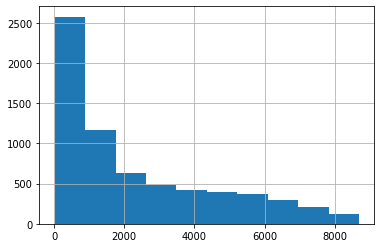

In [11]:
df_churn['TotalCharges'].hist()

Based on data distribution, used median to impute missing value.

In [12]:
imp_TotalCharges = Imputer(missing_values='NaN', strategy='median', axis=0)
df_churn['TotalCharges'] = imp_TotalCharges.fit_transform(df_churn[["TotalCharges"]]).ravel()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


For boolean and categorical data, filled missing value with previous data.

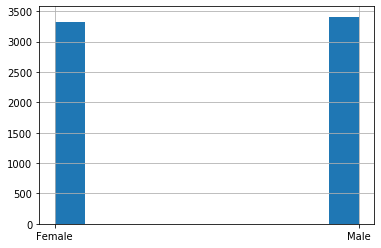

In [13]:
df_churn['gender'].hist()
df_churn['gender'] = df_churn['gender'].fillna(method='ffill')

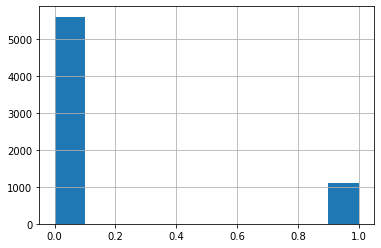

In [14]:
df_churn['SeniorCitizen'].hist()
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].fillna(method='ffill')

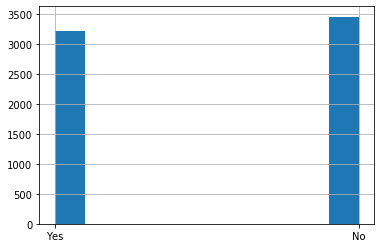

In [15]:
df_churn['Partner'].hist()
df_churn['Partner'] = df_churn['Partner'].fillna(method='ffill')

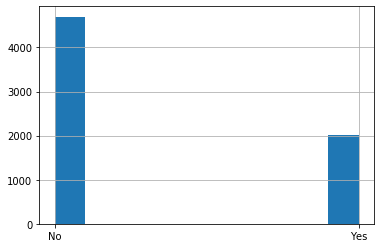

In [16]:
df_churn['Dependents'].hist()
df_churn['Dependents'] = df_churn['Dependents'].fillna(method='ffill')

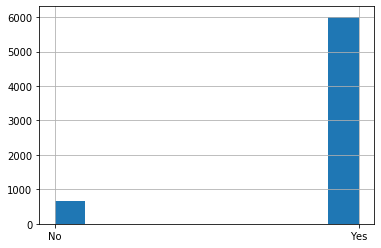

In [17]:
df_churn['PhoneService'].hist()
df_churn['PhoneService'] = df_churn['PhoneService'].fillna(method='ffill')

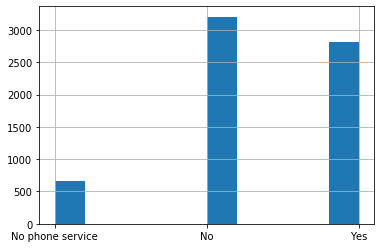

In [18]:
df_churn['MultipleLines'].hist()
df_churn['MultipleLines'] = df_churn['MultipleLines'].fillna(method='ffill')

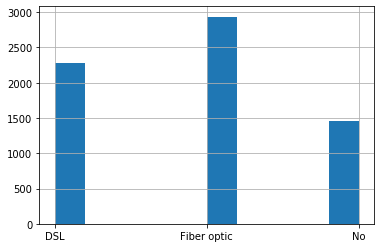

In [19]:
df_churn['InternetService'].hist()
df_churn['InternetService'] = df_churn['InternetService'].fillna(method='ffill')

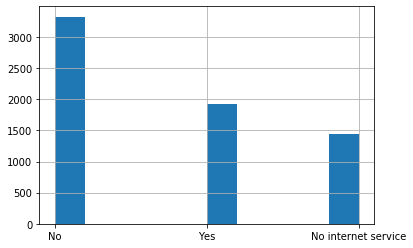

In [20]:
df_churn['OnlineSecurity'].hist()
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].fillna(method='ffill')

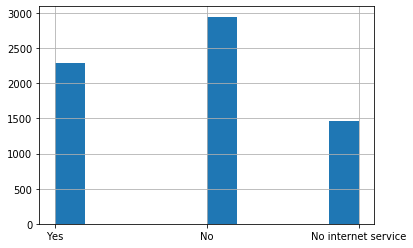

In [21]:
df_churn['OnlineBackup'].hist()
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].fillna(method='ffill')

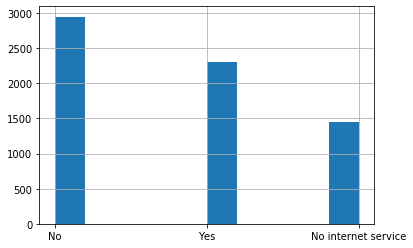

In [22]:
df_churn['DeviceProtection'].hist()
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].fillna(method='ffill')

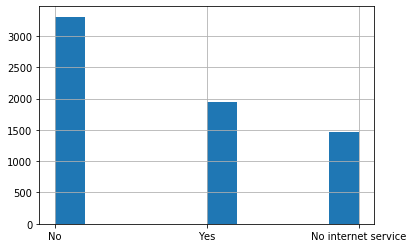

In [23]:
df_churn['TechSupport'].hist()
df_churn['TechSupport'] = df_churn['TechSupport'].fillna(method='ffill')

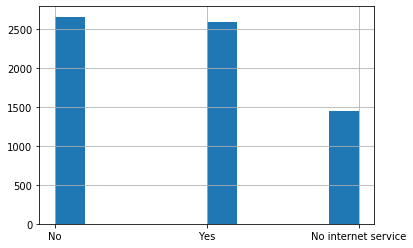

In [24]:
df_churn['StreamingTV'].hist()
df_churn['StreamingTV'] = df_churn['StreamingTV'].fillna(method='ffill')

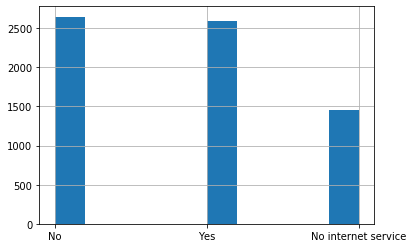

In [25]:
df_churn['StreamingMovies'].hist()
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].fillna(method='ffill')

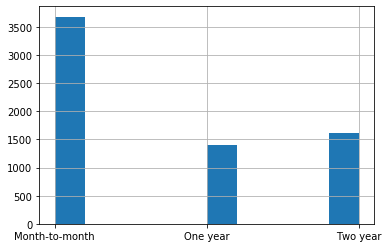

In [26]:
df_churn['Contract'].hist()
df_churn['Contract'] = df_churn['Contract'].fillna(method='ffill')

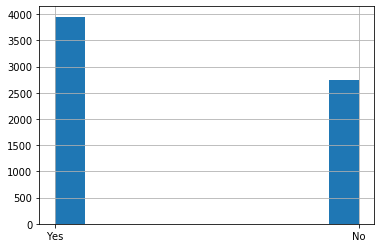

In [27]:
df_churn['PaperlessBilling'].hist()
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].fillna(method='ffill')

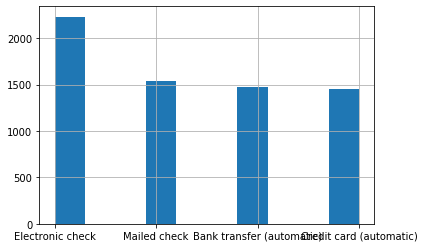

In [28]:
df_churn['PaymentMethod'].hist()
df_churn['PaymentMethod'] = df_churn['PaymentMethod'].fillna(method='ffill')

In [29]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6717 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               6689 non-null object
dtypes: float64(4), object(1

In [30]:
df_churn["SeniorCitizen"] = df_churn["SeniorCitizen"].astype(object)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6717 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               6689 non-null object
dtypes: float64(3), object(18

Drop other missing value that is in column customer and churn, because one is our target value, we don't want to mislead the model, and customerID doesn't affect our model, and will dorop the column later.

In [31]:
df_churn = df_churn.dropna()
df_churn.info()
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6380 entries, 0 to 7042
Data columns (total 21 columns):
customerID          6380 non-null object
gender              6380 non-null object
SeniorCitizen       6380 non-null object
Partner             6380 non-null object
Dependents          6380 non-null object
tenure              6380 non-null float64
PhoneService        6380 non-null object
MultipleLines       6380 non-null object
InternetService     6380 non-null object
OnlineSecurity      6380 non-null object
OnlineBackup        6380 non-null object
DeviceProtection    6380 non-null object
TechSupport         6380 non-null object
StreamingTV         6380 non-null object
StreamingMovies     6380 non-null object
Contract            6380 non-null object
PaperlessBilling    6380 non-null object
PaymentMethod       6380 non-null object
MonthlyCharges      6380 non-null float64
TotalCharges        6380 non-null float64
Churn               6380 non-null object
dtypes: float64(3), object(18

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df_churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,6380.000000,6380.000000,6380.000000
mean,32.582069,64.591922,2247.852332
std,23.909125,29.430666,2221.114584
min,0.000000,18.250000,18.800000
25%,10.000000,39.650000,443.637500
50%,32.000000,69.000000,1398.425000
75%,54.000000,89.350000,3615.975000
max,72.000000,118.750000,8684.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de73b90>,
      dtype=object)

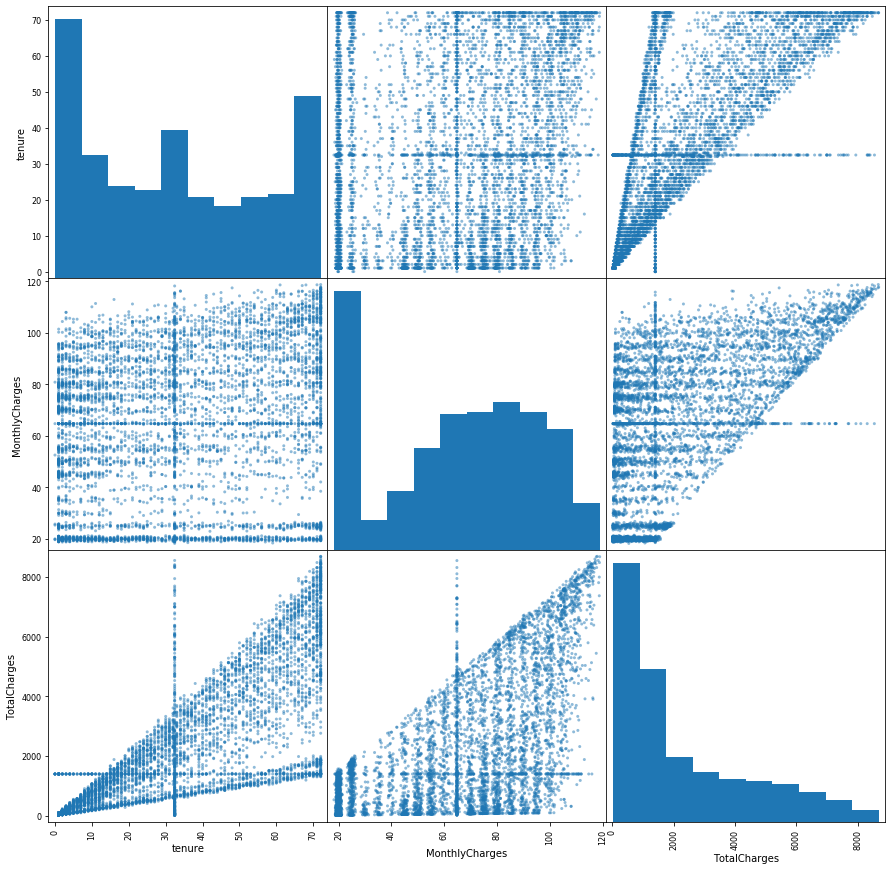

In [33]:
%matplotlib inline
pd.plotting.scatter_matrix(df_churn, figsize = (15, 15))

Transform data to number (Yes: 1, No: 0) or using dummy variable.

In [34]:
df_churn[['Churn', 'customerID']].groupby('Churn')['customerID'].count()

Churn
No     4699
Yes    1681
Name: customerID, dtype: int64

In [35]:
df_churn['Churn'] = df_churn['Churn'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['Churn', 'customerID']].groupby('Churn')['customerID'].count()

Churn
0    4699
1    1681
Name: customerID, dtype: int64

In [36]:
df_churn[['SeniorCitizen', 'customerID']].groupby('SeniorCitizen')['customerID'].count()

SeniorCitizen
0.0    5344
1.0    1036
Name: customerID, dtype: int64

In [37]:
df_churn[['gender', 'customerID']].groupby('gender')['customerID'].count()

gender
Female    3141
Male      3239
Name: customerID, dtype: int64

In [38]:
df_churn['gender'] = df_churn['gender'].map( {'Male': 1, 'Female': 0} ).astype(int)
df_churn[['gender', 'customerID']].groupby('gender')['customerID'].count()

gender
0    3141
1    3239
Name: customerID, dtype: int64

In [39]:
df_churn[['Partner', 'customerID']].groupby('Partner')['customerID'].count()

Partner
No     3286
Yes    3094
Name: customerID, dtype: int64

In [40]:
df_churn['Partner'] = df_churn['Partner'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['Partner', 'customerID']].groupby('Partner')['customerID'].count()

Partner
0    3286
1    3094
Name: customerID, dtype: int64

In [41]:
df_churn[['Dependents', 'customerID']].groupby('Dependents')['customerID'].count()

Dependents
No     4454
Yes    1926
Name: customerID, dtype: int64

In [42]:
df_churn['Dependents'] = df_churn['Dependents'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['Dependents', 'customerID']].groupby('Dependents')['customerID'].count()

Dependents
0    4454
1    1926
Name: customerID, dtype: int64

In [43]:
df_churn[['PhoneService', 'customerID']].groupby('PhoneService')['customerID'].count()

PhoneService
No      640
Yes    5740
Name: customerID, dtype: int64

In [44]:
df_churn['PhoneService'] = df_churn['PhoneService'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['PhoneService', 'customerID']].groupby('PhoneService')['customerID'].count()

PhoneService
0     640
1    5740
Name: customerID, dtype: int64

In [45]:
df_churn[['MultipleLines', 'customerID']].groupby('MultipleLines')['customerID'].count()

MultipleLines
No                  3050
No phone service     638
Yes                 2692
Name: customerID, dtype: int64

In [46]:
df_churn['MultipleLines'] = df_churn['MultipleLines'].map( {'Yes': 1, 'No': 0, 'No phone service': 0} ).astype(int)
df_churn[['MultipleLines', 'customerID']].groupby('MultipleLines')['customerID'].count()

MultipleLines
0    3688
1    2692
Name: customerID, dtype: int64

In [47]:
df_churn[['InternetService', 'customerID']].groupby('InternetService')['customerID'].count()

InternetService
DSL            2166
Fiber optic    2801
No             1413
Name: customerID, dtype: int64

In [48]:
InternetService = pd.get_dummies(df_churn['InternetService'],columns='InternetService',prefix='InternetService')
print(InternetService)
df_churn = pd.concat([df_churn, InternetService], axis=1)
df_churn.drop(['InternetService'],axis=1,inplace= True)
df_churn.shape

      InternetService_DSL  InternetService_Fiber optic  InternetService_No
0                       1                            0                   0
1                       1                            0                   0
2                       1                            0                   0
3                       1                            0                   0
4                       0                            1                   0
...                   ...                          ...                 ...
7038                    1                            0                   0
7039                    0                            1                   0
7040                    1                            0                   0
7041                    0                            1                   0
7042                    0                            1                   0

[6380 rows x 3 columns]


(6380, 23)

In [49]:
df_churn[['OnlineSecurity', 'customerID']].groupby('OnlineSecurity')['customerID'].count()

OnlineSecurity
No                     3129
No internet service    1407
Yes                    1844
Name: customerID, dtype: int64

In [50]:
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['OnlineSecurity', 'customerID']].groupby('OnlineSecurity')['customerID'].count()

OnlineSecurity
0    4536
1    1844
Name: customerID, dtype: int64

In [51]:
df_churn[['OnlineBackup', 'customerID']].groupby('OnlineBackup')['customerID'].count()

OnlineBackup
No                     2810
No internet service    1404
Yes                    2166
Name: customerID, dtype: int64

In [52]:
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['OnlineBackup', 'customerID']].groupby('OnlineBackup')['customerID'].count()

OnlineBackup
0    4214
1    2166
Name: customerID, dtype: int64

In [53]:
df_churn[['DeviceProtection', 'customerID']].groupby('DeviceProtection')['customerID'].count()

DeviceProtection
No                     2793
No internet service    1389
Yes                    2198
Name: customerID, dtype: int64

In [54]:
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['DeviceProtection', 'customerID']].groupby('DeviceProtection')['customerID'].count()

DeviceProtection
0    4182
1    2198
Name: customerID, dtype: int64

In [55]:
df_churn[['TechSupport', 'customerID']].groupby('TechSupport')['customerID'].count()

TechSupport
No                     3135
No internet service    1417
Yes                    1828
Name: customerID, dtype: int64

In [56]:
df_churn['TechSupport'] = df_churn['TechSupport'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['TechSupport', 'customerID']].groupby('TechSupport')['customerID'].count()

TechSupport
0    4552
1    1828
Name: customerID, dtype: int64

In [57]:
df_churn[['StreamingTV', 'customerID']].groupby('StreamingTV')['customerID'].count()

StreamingTV
No                     2523
No internet service    1394
Yes                    2463
Name: customerID, dtype: int64

In [58]:
df_churn['StreamingTV'] = df_churn['StreamingTV'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['StreamingTV', 'customerID']].groupby('StreamingTV')['customerID'].count()

StreamingTV
0    3917
1    2463
Name: customerID, dtype: int64

In [59]:
df_churn[['StreamingMovies', 'customerID']].groupby('StreamingMovies')['customerID'].count()

StreamingMovies
No                     2510
No internet service    1402
Yes                    2468
Name: customerID, dtype: int64

In [60]:
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].map( {'Yes': 1, 'No': 0, 'No internet service': 0} ).astype(int)
df_churn[['StreamingMovies', 'customerID']].groupby('StreamingMovies')['customerID'].count()

StreamingMovies
0    3912
1    2468
Name: customerID, dtype: int64

In [61]:
df_churn[['Contract', 'customerID']].groupby('Contract')['customerID'].count()

Contract
Month-to-month    3500
One year          1323
Two year          1557
Name: customerID, dtype: int64

In [62]:
Contract = pd.get_dummies(df_churn['Contract'],columns='Contract',prefix='Contract')
print(Contract)
df_churn = pd.concat([df_churn, Contract], axis=1)
df_churn.drop(['Contract'],axis=1,inplace= True)
df_churn.shape

      Contract_Month-to-month  Contract_One year  Contract_Two year
0                           1                  0                  0
1                           0                  1                  0
2                           1                  0                  0
3                           0                  1                  0
4                           1                  0                  0
...                       ...                ...                ...
7038                        0                  1                  0
7039                        0                  1                  0
7040                        1                  0                  0
7041                        1                  0                  0
7042                        0                  0                  1

[6380 rows x 3 columns]


(6380, 25)

In [63]:
df_churn[['PaperlessBilling', 'customerID']].groupby('PaperlessBilling')['customerID'].count()

PaperlessBilling
No     2624
Yes    3756
Name: customerID, dtype: int64

In [64]:
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].map( {'Yes': 1, 'No': 0} ).astype(int)
df_churn[['PaperlessBilling', 'customerID']].groupby('PaperlessBilling')['customerID'].count()

PaperlessBilling
0    2624
1    3756
Name: customerID, dtype: int64

In [65]:
df_churn[['PaymentMethod', 'customerID']].groupby('PaymentMethod')['customerID'].count()

PaymentMethod
Bank transfer (automatic)    1409
Credit card (automatic)      1371
Electronic check             2132
Mailed check                 1468
Name: customerID, dtype: int64

In [66]:
PaymentMethod = pd.get_dummies(df_churn['PaymentMethod'],columns='PaymentMethod',prefix='PaymentMethod')
print(PaymentMethod)
df_churn = pd.concat([df_churn, PaymentMethod], axis=1)
df_churn.drop(['PaymentMethod'],axis=1,inplace= True)
df_churn.shape

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041                                        0   
7042                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4               

(6380, 28)

In [67]:
df_churn[['MonthlyCharges', 'Churn']].groupby('Churn')['MonthlyCharges'].mean()

Churn
0    61.102918
1    74.344945
Name: MonthlyCharges, dtype: float64

In [68]:
df_churn[['TotalCharges', 'Churn']].groupby('Churn')['TotalCharges'].mean()

Churn
0    2491.454900
1    1566.895479
Name: TotalCharges, dtype: float64

In [69]:
df_churn[['tenure', 'Churn']].groupby('Churn')['tenure'].mean()

Churn
0    37.469656
1    18.919504
Name: tenure, dtype: float64

customerID doesn't affect our model, so drop it.

In [70]:
df_churn.drop(['customerID'],axis=1,inplace= True)

In [71]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6380 entries, 0 to 7042
Data columns (total 27 columns):
gender                                     6380 non-null int64
SeniorCitizen                              6380 non-null object
Partner                                    6380 non-null int64
Dependents                                 6380 non-null int64
tenure                                     6380 non-null float64
PhoneService                               6380 non-null int64
MultipleLines                              6380 non-null int64
OnlineSecurity                             6380 non-null int64
OnlineBackup                               6380 non-null int64
DeviceProtection                           6380 non-null int64
TechSupport                                6380 non-null int64
StreamingTV                                6380 non-null int64
StreamingMovies                            6380 non-null int64
PaperlessBilling                           6380 non-null int64
MonthlyC

### Splitting data

In [72]:
y_variable = 'Churn'
X_features = [ i for i in df_churn.columns if(i!=y_variable)]

df_churn_X = df_churn[X_features]
df_churn_y = df_churn[y_variable]

In [73]:
df_churn_X_train_org, df_churn_X_test_org, df_churn_y_train, df_churn_y_test = train_test_split(df_churn_X, df_churn_y,random_state=0)

### Scaling data: using MinMaxScaler()

Because we don't want to change the distribution of the dataset.

In [74]:
minmaxS = MinMaxScaler()
df_churn_X_train = minmaxS.fit_transform(df_churn_X_train_org)
df_churn_X_test = minmaxS.transform(df_churn_X_test_org)

In [75]:
df_churn.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [76]:
df_churn_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
df_churn_X_train = pd.DataFrame(df_churn_X_train, columns = df_churn_columns)
df_churn_X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,...,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.00000
mean,0.504911,0.163427,0.484848,0.298433,0.455546,0.899687,0.421108,0.291327,0.342320,0.345455,...,0.337513,0.442006,0.220481,0.551933,0.205434,0.242633,0.221317,0.213375,0.336468,0.22884
std,0.500028,0.369794,0.499823,0.457618,0.331670,0.300449,0.493788,0.454421,0.474536,0.475566,...,0.472911,0.496677,0.414614,0.497348,0.404060,0.428720,0.415177,0.409733,0.472551,0.42013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.138889,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,0.000000,0.000000,0.450392,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Classification Model

### KNN classification

In [77]:
knn_param_grid = {'n_neighbors': np.arange(1, 51),
              'weights': ['uniform','distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
knn_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))

knn_result = pd.DataFrame(knn_grid_search.cv_results_)
#knn_result.head()

Best parameters: {'n_neighbors': 45, 'weights': 'uniform'}
Best cross-validation score: 0.8265


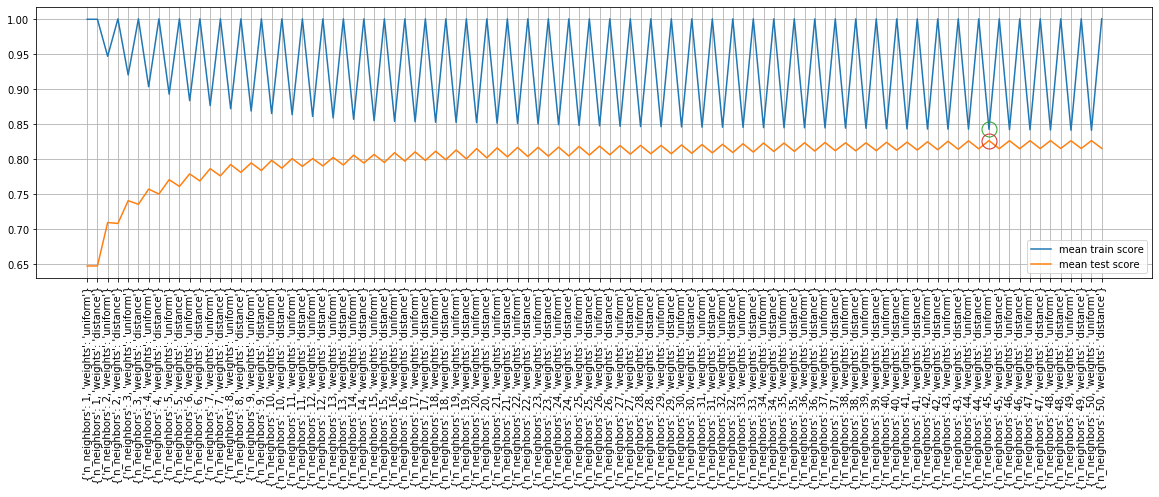

In [78]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_train_score'], label = 'mean train score')
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(knn_result['params'].shape[0]), knn_result['params'], rotation = 90)
plt.plot([knn_grid_search.best_index_], knn_result['mean_train_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([knn_grid_search.best_index_], knn_result['mean_test_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [79]:
%%time
knn_pred = knn_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, knn_pred))
print(classification_report(df_churn_y_test, knn_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, knn_pred)))
knn_roc_auc_score = roc_auc_score(df_churn_y_test, knn_pred)

[[1022  166]
 [ 178  229]]
              precision    recall  f1-score   support

           0     0.8517    0.8603    0.8559      1188
           1     0.5797    0.5627    0.5711       407

    accuracy                         0.7843      1595
   macro avg     0.7157    0.7115    0.7135      1595
weighted avg     0.7823    0.7843    0.7833      1595

roc_auc_score: 0.7115
CPU times: user 338 ms, sys: 3.6 ms, total: 342 ms
Wall time: 343 ms


### Logistic Regression

In [80]:
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid_search = GridSearchCV(LogisticRegression(random_state = 0, solver = 'lbfgs'), log_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
log_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(log_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(log_grid_search.best_score_))

log_result = pd.DataFrame(log_grid_search.cv_results_)
#log_result.head()

Best parameters: {'C': 1000}
Best cross-validation score: 0.8424


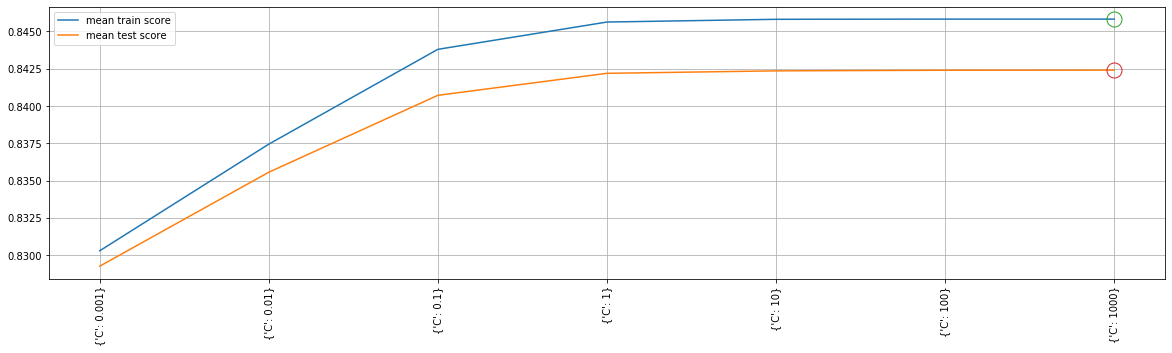

In [81]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(log_result['params'].shape[0]), log_result['mean_train_score'], label = 'mean train score')
plt.plot(range(log_result['params'].shape[0]), log_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(log_result['params'].shape[0]), log_result['params'], rotation = 90)
plt.plot([log_grid_search.best_index_], log_result['mean_train_score'][log_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([log_grid_search.best_index_], log_result['mean_test_score'][log_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [82]:
%%time
log_pred = log_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, log_pred))
print(classification_report(df_churn_y_test, log_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, log_pred)))
log_roc_auc_score = roc_auc_score(df_churn_y_test, log_pred)

[[1063  125]
 [ 193  214]]
              precision    recall  f1-score   support

           0     0.8463    0.8948    0.8699      1188
           1     0.6313    0.5258    0.5737       407

    accuracy                         0.8006      1595
   macro avg     0.7388    0.7103    0.7218      1595
weighted avg     0.7915    0.8006    0.7943      1595

roc_auc_score: 0.7103
CPU times: user 19.7 ms, sys: 2.84 ms, total: 22.5 ms
Wall time: 13.9 ms


### Linear Support Vector Machine 

In [83]:
lsvc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lsvc_grid_search = GridSearchCV(LinearSVC(random_state = 0, max_iter = 10000), lsvc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
lsvc_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(lsvc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(lsvc_grid_search.best_score_))

lsvc_result = pd.DataFrame(lsvc_grid_search.cv_results_)
#lsvc_result.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Best parameters: {'C': 100}
Best cross-validation score: 0.8411


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


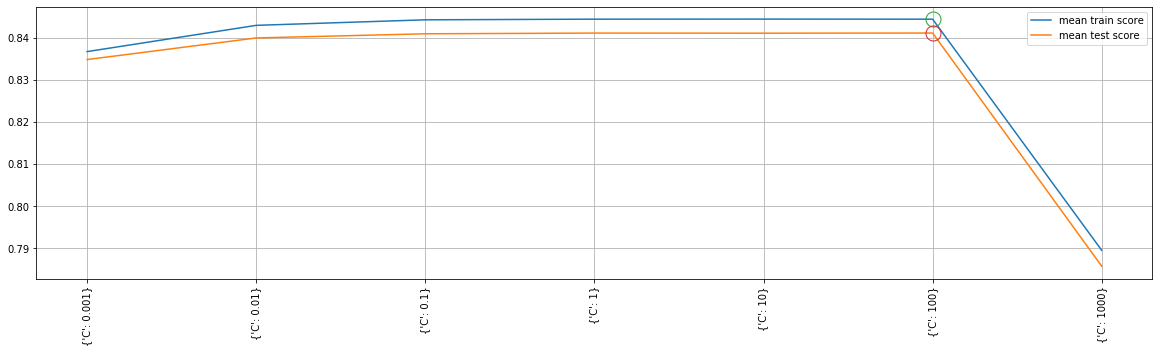

In [84]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(lsvc_result['params'].shape[0]), lsvc_result['mean_train_score'], label = 'mean train score')
plt.plot(range(lsvc_result['params'].shape[0]), lsvc_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(lsvc_result['params'].shape[0]), lsvc_result['params'], rotation = 90)
plt.plot([lsvc_grid_search.best_index_], lsvc_result['mean_train_score'][lsvc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([lsvc_grid_search.best_index_], lsvc_result['mean_test_score'][lsvc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [85]:
%%time
lsvc_pred = lsvc_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, lsvc_pred))
print(classification_report(df_churn_y_test, lsvc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, lsvc_pred)))
lsvc_roc_auc_score = roc_auc_score(df_churn_y_test, lsvc_pred)

[[1063  125]
 [ 185  222]]
              precision    recall  f1-score   support

           0     0.8518    0.8948    0.8727      1188
           1     0.6398    0.5455    0.5889       407

    accuracy                         0.8056      1595
   macro avg     0.7458    0.7201    0.7308      1595
weighted avg     0.7977    0.8056    0.8003      1595

roc_auc_score: 0.7201
CPU times: user 20.4 ms, sys: 3.07 ms, total: 23.5 ms
Wall time: 21.8 ms


### Kerenilzed Support Vector Machine (rbf, poly, and linear)

In [86]:
svc_param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['poly'],
               'degree': np.arange(1, 11)}
             ]
svc_grid_search = GridSearchCV(SVC(random_state = 0), svc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
svc_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(svc_grid_search.best_score_))


svc_result = pd.DataFrame(svc_grid_search.cv_results_)
#svc_result.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.8381


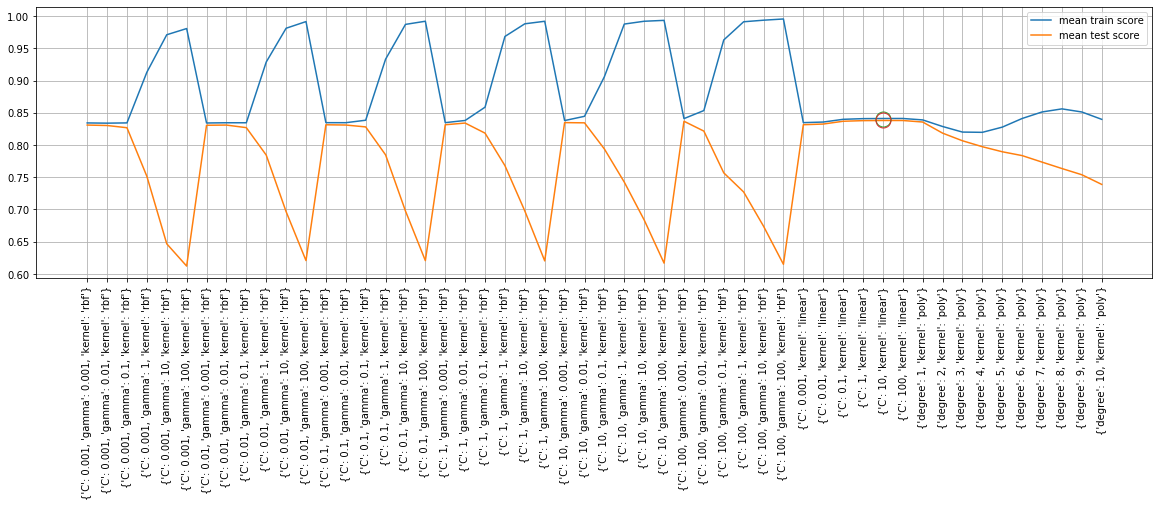

In [87]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(svc_result['params'].shape[0]), svc_result['mean_train_score'], label = 'mean train score')
plt.plot(range(svc_result['params'].shape[0]), svc_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(svc_result['params'].shape[0]), svc_result['params'], rotation = 90)
plt.plot([svc_grid_search.best_index_], svc_result['mean_train_score'][svc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svc_grid_search.best_index_], svc_result['mean_test_score'][svc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [88]:
%%time
svc_pred = svc_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, svc_pred))
print(classification_report(df_churn_y_test, svc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, svc_pred)))
svc_roc_auc_score = roc_auc_score(df_churn_y_test, svc_pred)

[[1059  129]
 [ 191  216]]
              precision    recall  f1-score   support

           0     0.8472    0.8914    0.8687      1188
           1     0.6261    0.5307    0.5745       407

    accuracy                         0.7994      1595
   macro avg     0.7366    0.7111    0.7216      1595
weighted avg     0.7908    0.7994    0.7937      1595

roc_auc_score: 0.7111
CPU times: user 87.3 ms, sys: 2.63 ms, total: 89.9 ms
Wall time: 94.1 ms


### Decision Tree

In [89]:
tree_param_grid = {'max_depth': np.arange(1, 11), 
                   'criterion': ['gini','entropy']
                  }
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), tree_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
tree_grid_search.fit(df_churn_X_train, df_churn_y_train)
print("Best parameters: {}".format(tree_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(tree_grid_search.best_score_))

tree_result = pd.DataFrame(tree_grid_search.cv_results_)
#tree_result.head()

Best parameters: {'criterion': 'entropy', 'max_depth': 5}
Best cross-validation score: 0.8189


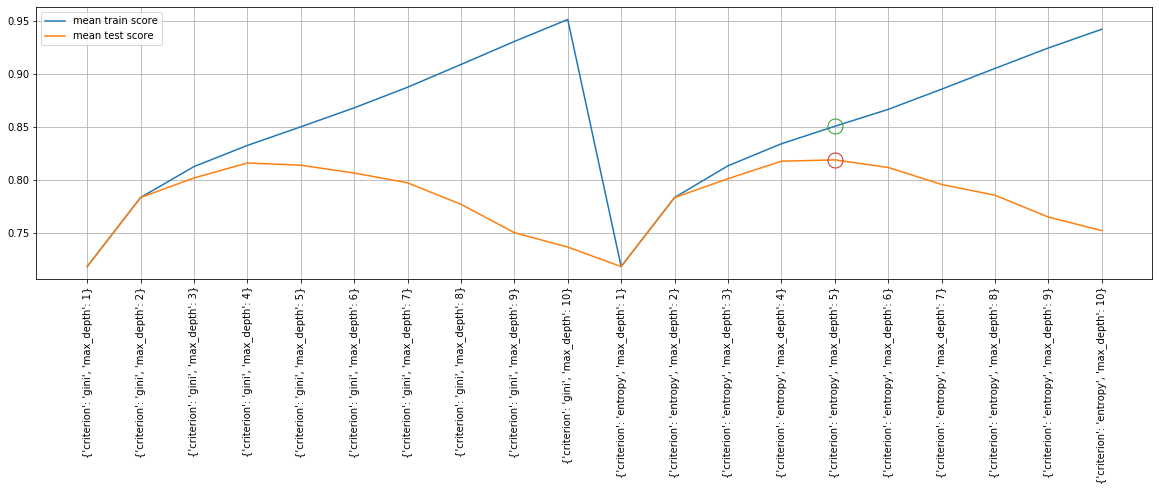

In [90]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(tree_result['params'].shape[0]), tree_result['mean_train_score'], label = 'mean train score')
plt.plot(range(tree_result['params'].shape[0]), tree_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(tree_result['params'].shape[0]), tree_result['params'], rotation = 90)
plt.plot([tree_grid_search.best_index_], tree_result['mean_train_score'][tree_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([tree_grid_search.best_index_], tree_result['mean_test_score'][tree_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [91]:
%%time
tree_pred = tree_grid_search.predict(df_churn_X_test)
print(confusion_matrix(df_churn_y_test, tree_pred))
print(classification_report(df_churn_y_test, tree_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, tree_pred)))
tree_roc_auc_score = roc_auc_score(df_churn_y_test, tree_pred)

[[976 212]
 [157 250]]
              precision    recall  f1-score   support

           0     0.8614    0.8215    0.8410      1188
           1     0.5411    0.6143    0.5754       407

    accuracy                         0.7687      1595
   macro avg     0.7013    0.7179    0.7082      1595
weighted avg     0.7797    0.7687    0.7732      1595

roc_auc_score: 0.7179
CPU times: user 11.7 ms, sys: 1.88 ms, total: 13.6 ms
Wall time: 15.1 ms


# Model Performances

## Precision recall curves

### KNN classification

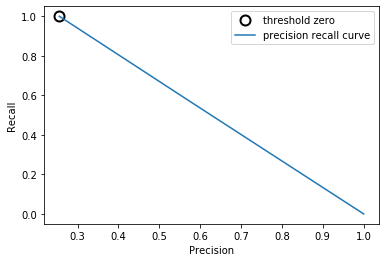

In [92]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, knn_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Logistic Regression

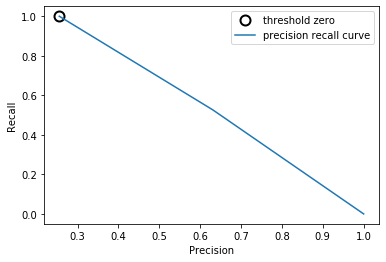

In [93]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, log_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Linear Support Vector Machine 

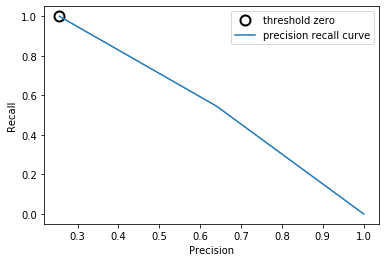

In [94]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, lsvc_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Kerenilzed Support Vector Machine (rbf, poly, and linear)

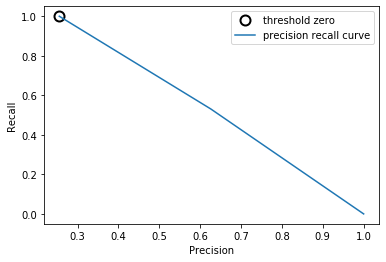

In [95]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, svc_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### Decision Tree

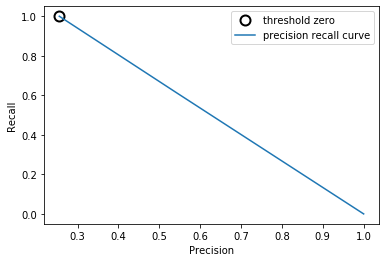

In [96]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(df_churn_y_test, tree_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

## ROC Curves

### KNN classification

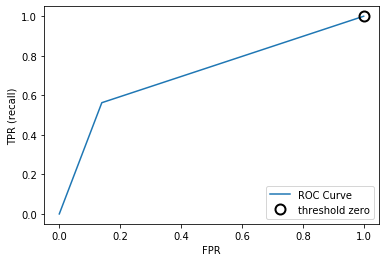

In [97]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, knn_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Logistic Regression

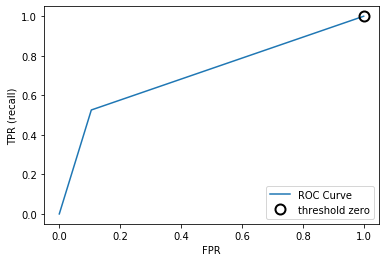

In [98]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, log_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Linear Support Vector Machine 

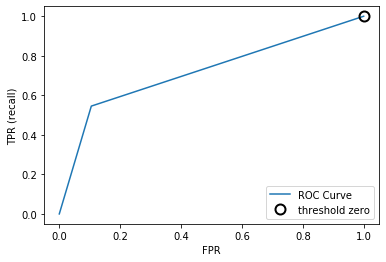

In [99]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, lsvc_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Kerenilzed Support Vector Machine (rbf, poly, and linear)

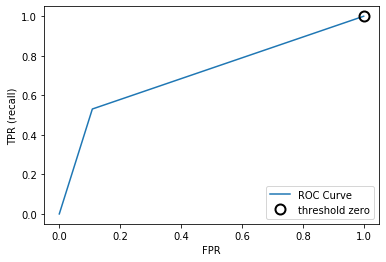

In [100]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, svc_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### Decision Tree

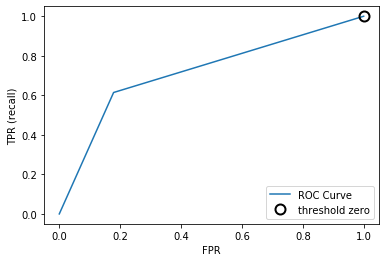

In [101]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(df_churn_y_test, tree_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Model Performance Metrics

In [102]:
model_performance_metrics = pd.DataFrame({"Model": ['KNN classification', 'Logistic Regression', 'Linear Support Vector Machine', 'Kerenilzed Support Vector Machine', 'Decision Tree'],
                                          "Cross-validation Score": [knn_grid_search.best_score_, log_grid_search.best_score_, lsvc_grid_search.best_score_, svc_grid_search.best_score_, tree_grid_search.best_score_],
                                          "Roc_Auc_Score": [knn_roc_auc_score, log_roc_auc_score, lsvc_roc_auc_score, svc_roc_auc_score, tree_roc_auc_score],
                                         })

In [103]:
model_performance_metrics

,Model,Cross-validation Score,Roc_Auc_Score
0,KNN classification,0.826504,0.711461
1,Logistic Regression,0.842410,0.710290
2,Linear Support Vector Machine,0.841096,0.720118
3,Kerenilzed Support Vector Machine,0.838062,0.711063
4,Decision Tree,0.818888,0.717900


# Conclusion

Based on the final roc auc score, performance of all models are similar, and KNN classification has the highest score. But if we consider the run time, logistic regression or decision tree may be the better options.

# Project 2

### Build each model using the best parameter in project 1

In [104]:
#knn
knn = KNeighborsClassifier(50)
knn.fit(df_churn_X_train, df_churn_y_train)
#logistic regression
log = LogisticRegression(random_state = 0, solver = 'lbfgs', C = 1)
log.fit(df_churn_X_train, df_churn_y_train)
#linear SVC
l_svc = LinearSVC(random_state = 0, max_iter = 10000, C = 0.01)
l_svc.fit(df_churn_X_train, df_churn_y_train)
#kernel SVC
svc = SVC(random_state = 0, kernel = 'linear', C = 0.1, probability = True)
svc.fit(df_churn_X_train, df_churn_y_train)
#decision tree
tree = DecisionTreeClassifier(random_state = 0, max_depth = 5)
tree.fit(df_churn_X_train, df_churn_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

##  hard voting

In [105]:
from sklearn.ensemble import VotingClassifier
voting_clf1 = VotingClassifier(estimators=[('knn', knn), ('log', log), ('l_svc', l_svc), ('svc', svc), ('tree', tree)], voting='hard')
voting_clf1.fit(df_churn_X_train, df_churn_y_train)

for clf in (knn, log, l_svc, svc, tree, voting_clf1):
    clf.fit(df_churn_X_train, df_churn_y_train)
    y_pred1 = clf.predict(df_churn_X_test)
    print(clf.__class__.__name__, roc_auc_score(df_churn_y_test, y_pred1))

KNeighborsClassifier 0.7111429611429612
LogisticRegression 0.7086745836745837
LinearSVC 0.7042497042497042
SVC 0.7065702065702066
DecisionTreeClassifier 0.7170920920920921
VotingClassifier 0.7090613340613341


##  soft voting

In [106]:
from sklearn.ensemble import VotingClassifier
voting_clf2 = VotingClassifier(estimators=[('knn', knn), ('log', log), ('svc', svc), ('tree', tree)], voting='soft')
voting_clf2.fit(df_churn_X_train, df_churn_y_train)

for clf in (knn, log, svc, tree, voting_clf2):
    clf.fit(df_churn_X_train, df_churn_y_train)
    y_pred2 = clf.predict(df_churn_X_test)
    print(clf.__class__.__name__, roc_auc_score(df_churn_y_test, y_pred2))

KNeighborsClassifier 0.7111429611429612
LogisticRegression 0.7086745836745837
SVC 0.7065702065702066
DecisionTreeClassifier 0.7170920920920921
VotingClassifier 0.7098689598689599


## bagging

In [107]:
#Comment grid search code, due to the long execution time

from sklearn.ensemble import BaggingClassifier

#bag_pas_grid = {'n_estimators': [100, 500,1000], 'max_samples': [100, 500, 1000], 'max_features': [1, 5, 10]}
 
#knn grid search
#bag_knn_grid = GridSearchCV(BaggingClassifier(knn, random_state = 0, bootstrap = True, oob_score = True), bag_pas_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
#bag_knn_grid.fit(df_churn_X_train, df_churn_y_train)
#bag_knn_y_pred = bag_knn_grid.predict(df_churn_X_test)
#print("Best parameters: {}".format(bag_knn_grid.best_params_))
#print("knn bagging auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, bag_knn_y_pred)))

#knn - based on the best parameter from grid search
knn_bag_clf = BaggingClassifier(knn, n_estimators = 1000, max_samples = 1000, max_features = 5, random_state = 0, bootstrap = True, oob_score = True)
knn_bag_clf.fit(df_churn_X_train, df_churn_y_train)
knn_bag_y_pred = knn_bag_clf.predict(df_churn_X_test)
print("knn bagging auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, knn_bag_y_pred)))

#logistic regression grid search
# bag_log_grid = GridSearchCV(BaggingClassifier(log, random_state = 0, bootstrap = True, oob_score = True), bag_pas_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
# bag_log_grid.fit(df_churn_X_train, df_churn_y_train)
# bag_log_y_pred = bag_log_grid.predict(df_churn_X_test)
# print("Best parameters: {}".format(bag_log_grid.best_params_))
# print("logistic regression bagging auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, bag_log_y_pred)))

#logistic regression - based on the best parameter from grid search
bag_log_clf = BaggingClassifier(log, n_estimators = 500, max_samples = 1000, max_features = 10, random_state = 0, bootstrap = True, oob_score = True)
bag_log_clf.fit(df_churn_X_train, df_churn_y_train)
bag_log_y_pred = bag_log_clf.predict(df_churn_X_test)
print("logistic regression bagging auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, bag_log_y_pred)))

knn bagging auc score :0.5511
logistic regression bagging auc score :0.6662


## pasting

In [108]:
#Comment grid search code, due to the long execution time

#bag_pas_grid = {'n_estimators': [100, 500,1000], 'max_samples': [100, 500, 1000], 'max_features': [1, 5, 10]}

#knn grid search
# pas_knn_grid = GridSearchCV(BaggingClassifier(knn, random_state = 0, bootstrap = False), bag_pas_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
# pas_knn_grid.fit(df_churn_X_train, df_churn_y_train)
# pas_knn_y_pred = pas_knn_grid.predict(df_churn_X_test)
# print("Best parameters: {}".format(pas_knn_grid.best_params_))
# print("knn pasting auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, pas_knn_y_pred)))

#knn - based on the best parameter from grid search
knn_pas_clf = BaggingClassifier(knn, n_estimators = 1000, max_samples = 1000, max_features = 5, random_state = 0, bootstrap = False)
knn_pas_clf.fit(df_churn_X_train, df_churn_y_train)
knn_pas_y_pred = knn_pas_clf.predict(df_churn_X_test)
print("knn pasting auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, knn_pas_y_pred)))

#logistic regression grid search
# pas_log_grid = GridSearchCV(BaggingClassifier(log, random_state = 0, bootstrap = False), bag_pas_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
# pas_log_grid.fit(df_churn_X_train, df_churn_y_train)
# pas_log_y_pred = pas_log_grid.predict(df_churn_X_test)
# print("Best parameters: {}".format(pas_log_grid.best_params_))
# print("logistic regression pasting auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, pas_log_y_pred)))

#logistic regression - based on the best parameter from grid search
log_pas_clf = BaggingClassifier(log, n_estimators = 500, max_samples = 1000, max_features = 10, random_state = 0, bootstrap = False)
log_pas_clf.fit(df_churn_X_train, df_churn_y_train)
log_pas_y_pred = log_pas_clf.predict(df_churn_X_test)
print("logistic regression pasting auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, log_pas_y_pred)))

knn pasting auc score :0.5527
logistic regression pasting auc score :0.6649


## adaboost

In [110]:
#Comment grid search code, due to the long execution time

from sklearn.ensemble import AdaBoostClassifier

#learning_grid = {'learning_rate': [0.01, 0.1, 0.5, 1]}

#logistic grid search
# log_learning_grid_search = GridSearchCV(AdaBoostClassifier(log, n_estimators=200, algorithm="SAMME.R", random_state=0), learning_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
# log_learning_grid_search.fit(df_churn_X_train, df_churn_y_train)
# log_ada_y_pred = log_learning_grid_search.predict(df_churn_X_test)
# print("Best parameters: {}".format(log_learning_grid_search.best_params_))
# print("logistic regression adaboost auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, log_ada_y_pred)))

#logistic regression - based on the best parameter from grid search
log_ada_clf = AdaBoostClassifier(log, n_estimators = 200, algorithm = "SAMME.R", learning_rate = 1, random_state = 0)
log_ada_clf.fit(df_churn_X_train, df_churn_y_train)
log_ada_y_pred = log_ada_clf.predict(df_churn_X_test)
print("SVC adaboost auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, log_ada_y_pred)))

#decision tree grid search
# tree_learning_grid_search = GridSearchCV(AdaBoostClassifier(tree, n_estimators=200, algorithm="SAMME.R", random_state=0), learning_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
# tree_learning_grid_search.fit(df_churn_X_train, df_churn_y_train)
# tree_ada_y_pred = tree_learning_grid_search.predict(df_churn_X_test)
# print("Best parameters: {}".format(tree_learning_grid_search.best_params_))
# print("decision tree adaboost auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, tree_ada_y_pred)))

#decision tree - based on the best parameter from grid search
tree_ada_clf = AdaBoostClassifier(tree, n_estimators = 200, algorithm = "SAMME.R", learning_rate = 0.01, random_state = 0)
tree_ada_clf.fit(df_churn_X_train, df_churn_y_train)
tree_ada_y_pred = tree_ada_clf.predict(df_churn_X_test)
print("decision tree adaboost auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, tree_ada_y_pred)))

SVC adaboost auc score :0.7033
decision tree adaboost auc score :0.7021


##  gradient boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

learning_grid = {'learning_rate': [0.01, 0.1, 0.5, 1]}
gbrt_clf = GridSearchCV(GradientBoostingClassifier(random_state = 0), learning_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
gbrt_clf.fit(df_churn_X_train, df_churn_y_train)
gbrt_y_pred = gbrt_clf.predict(df_churn_X_test)
print("Best parameters: {}".format(gbrt_clf.best_params_))
print("gradient boosting auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, gbrt_y_pred)))

#gbrt_clf = GradientBoostingClassifier(random_state = 0, learning_rate = 0.1)
#gbrt_clf.fit(df_churn_X_train, df_churn_y_train)
#gbrt_y_pred = gbrt_clf.predict(df_churn_X_test)
#print("gradient boosting auc score :{:.4f}".format(roc_auc_score(df_churn_y_test, gbrt_y_pred)))

Best parameters: {'learning_rate': 0.1}
gradient boosting auc score :0.6967


## PCA

In [112]:
from sklearn.decomposition import PCA
df_churn_pca = PCA(n_components=0.95)
df_churn_X_reduced_train = df_churn_pca.fit_transform(df_churn_X_train)
df_churn_X_reduced_test = df_churn_pca.transform(df_churn_X_test)
df_churn_pca.n_components_

18

### knn 

In [113]:
knn_param_grid = {'n_neighbors': np.arange(1, 51),
              'weights': ['uniform','distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
knn_grid_search.fit(df_churn_X_reduced_train, df_churn_y_train)
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))

knn_result = pd.DataFrame(knn_grid_search.cv_results_)

Best parameters: {'n_neighbors': 50, 'weights': 'uniform'}
Best cross-validation score: 0.8197


In [114]:
%%time
knn_pred = knn_grid_search.predict(df_churn_X_reduced_test)
print(confusion_matrix(df_churn_y_test, knn_pred))
print(classification_report(df_churn_y_test, knn_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, knn_pred)))
knn_pca_roc_auc_score = roc_auc_score(df_churn_y_test, knn_pred)

[[1048  140]
 [ 201  206]]
              precision    recall  f1-score   support

           0     0.8391    0.8822    0.8601      1188
           1     0.5954    0.5061    0.5471       407

    accuracy                         0.7862      1595
   macro avg     0.7172    0.6941    0.7036      1595
weighted avg     0.7769    0.7862    0.7802      1595

roc_auc_score: 0.6941
CPU times: user 293 ms, sys: 4.47 ms, total: 297 ms
Wall time: 322 ms


### logistic regression

In [115]:
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid_search = GridSearchCV(LogisticRegression(random_state = 0, solver = 'lbfgs'), log_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
log_grid_search.fit(df_churn_X_reduced_train, df_churn_y_train)
print("Best parameters: {}".format(log_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(log_grid_search.best_score_))

log_result = pd.DataFrame(log_grid_search.cv_results_)

Best parameters: {'C': 10}
Best cross-validation score: 0.8304


In [116]:
%%time
log_pred = log_grid_search.predict(df_churn_X_reduced_test)
print(confusion_matrix(df_churn_y_test, log_pred))
print(classification_report(df_churn_y_test, log_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, log_pred)))
log_pca_roc_auc_score = roc_auc_score(df_churn_y_test, log_pred)

[[1052  136]
 [ 210  197]]
              precision    recall  f1-score   support

           0     0.8336    0.8855    0.8588      1188
           1     0.5916    0.4840    0.5324       407

    accuracy                         0.7831      1595
   macro avg     0.7126    0.6848    0.6956      1595
weighted avg     0.7718    0.7831    0.7755      1595

roc_auc_score: 0.6848
CPU times: user 13.3 ms, sys: 1.49 ms, total: 14.8 ms
Wall time: 17.1 ms


### linear SVM

In [117]:
lsvc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lsvc_grid_search = GridSearchCV(LinearSVC(random_state = 0, max_iter = 10000), lsvc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
lsvc_grid_search.fit(df_churn_X_reduced_train, df_churn_y_train)
print("Best parameters: {}".format(lsvc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(lsvc_grid_search.best_score_))

lsvc_result = pd.DataFrame(lsvc_grid_search.cv_results_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Best parameters: {'C': 10}
Best cross-validation score: 0.8284


In [118]:
%%time
lsvc_pred = lsvc_grid_search.predict(df_churn_X_reduced_test)
print(confusion_matrix(df_churn_y_test, lsvc_pred))
print(classification_report(df_churn_y_test, lsvc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, lsvc_pred)))
lsvc_pca_roc_auc_score = roc_auc_score(df_churn_y_test, lsvc_pred)

[[1060  128]
 [ 225  182]]
              precision    recall  f1-score   support

           0     0.8249    0.8923    0.8573      1188
           1     0.5871    0.4472    0.5077       407

    accuracy                         0.7787      1595
   macro avg     0.7060    0.6697    0.6825      1595
weighted avg     0.7642    0.7787    0.7681      1595

roc_auc_score: 0.6697
CPU times: user 16.6 ms, sys: 2.04 ms, total: 18.6 ms
Wall time: 30 ms


### svm

In [119]:
svc_param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['poly'],
               'degree': np.arange(1, 11)}
             ]
svc_grid_search = GridSearchCV(SVC(random_state = 0), svc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
svc_grid_search.fit(df_churn_X_reduced_train, df_churn_y_train)
print("Best parameters: {}".format(svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(svc_grid_search.best_score_))


svc_result = pd.DataFrame(svc_grid_search.cv_results_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.8256


In [120]:
%%time
svc_pred = svc_grid_search.predict(df_churn_X_reduced_test)
print(confusion_matrix(df_churn_y_test, svc_pred))
print(classification_report(df_churn_y_test, svc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, svc_pred)))
svc_pca_roc_auc_score = roc_auc_score(df_churn_y_test, svc_pred)

[[1040  148]
 [ 199  208]]
              precision    recall  f1-score   support

           0     0.8394    0.8754    0.8570      1188
           1     0.5843    0.5111    0.5452       407

    accuracy                         0.7824      1595
   macro avg     0.7118    0.6932    0.7011      1595
weighted avg     0.7743    0.7824    0.7775      1595

roc_auc_score: 0.6932
CPU times: user 74.3 ms, sys: 3.55 ms, total: 77.8 ms
Wall time: 96.8 ms


### decision tree

In [121]:
tree_param_grid = {'max_depth': np.arange(1, 11), 
                   'criterion': ['gini','entropy']
                  }
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), tree_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
tree_grid_search.fit(df_churn_X_reduced_train, df_churn_y_train)
print("Best parameters: {}".format(tree_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(tree_grid_search.best_score_))

tree_result = pd.DataFrame(tree_grid_search.cv_results_)

Best parameters: {'criterion': 'entropy', 'max_depth': 3}
Best cross-validation score: 0.8102


In [122]:
%%time
tree_pred = tree_grid_search.predict(df_churn_X_reduced_test)
print(confusion_matrix(df_churn_y_test, tree_pred))
print(classification_report(df_churn_y_test, tree_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(df_churn_y_test, tree_pred)))
tree_pca_roc_auc_score = roc_auc_score(df_churn_y_test, tree_pred)

[[1027  161]
 [ 195  212]]
              precision    recall  f1-score   support

           0     0.8404    0.8645    0.8523      1188
           1     0.5684    0.5209    0.5436       407

    accuracy                         0.7768      1595
   macro avg     0.7044    0.6927    0.6979      1595
weighted avg     0.7710    0.7768    0.7735      1595

roc_auc_score: 0.6927
CPU times: user 11.7 ms, sys: 1.73 ms, total: 13.4 ms
Wall time: 12.9 ms


### Comparion: 

In [123]:
model_performance_metrics = pd.DataFrame({"Model": ['KNN classification', 'Logistic Regression', 'Linear Support Vector Machine', 'Kerenilzed Support Vector Machine', 'Decision Tree'],
                                          "Roc_Auc_Score": [knn_roc_auc_score, log_roc_auc_score, lsvc_roc_auc_score, svc_roc_auc_score, tree_roc_auc_score],
                                          "Roc_Auc_Score_PCA": [knn_pca_roc_auc_score, log_pca_roc_auc_score, lsvc_pca_roc_auc_score, svc_pca_roc_auc_score, tree_pca_roc_auc_score]
                                         })

In [124]:
model_performance_metrics

,Model,Roc_Auc_Score,Roc_Auc_Score_PCA
0,KNN classification,0.711461,0.694149
1,Logistic Regression,0.710290,0.684776
2,Linear Support Vector Machine,0.720118,0.669715
3,Kerenilzed Support Vector Machine,0.711063,0.693239
4,Decision Tree,0.717900,0.692681


After PCA, the result from each model did not improve, even a little worse.

## deep learning

In [125]:
df_churn_y_train.unique()

array([0, 1])

In [126]:
df_churn_Y_train = pd.get_dummies(df_churn_y_train)
df_churn_Y_test = pd.get_dummies(df_churn_y_test)

df_churn_Y_train.head()

,0,1
3933,1,0
42,1,0
179,1,0
1439,0,1
5020,1,0


In [127]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
#input layer
model.add(Dense(64, activation = 'relu', input_dim = df_churn_X_train.shape[1]))
#hidden layer
model.add(Dense(32, activation = 'relu'))
#output layer
model.add(Dense(2, activation = 'softmax'))

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [128]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'] )

In [129]:
model.fit(df_churn_X_train, df_churn_Y_train, epochs = 70, batch_size = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/70
4785/4785 [==============================] - 0s 67us/step - loss: 0.5154 - acc: 0.7406
Epoch 2/70
4785/4785 [==============================] - 0s 13us/step - loss: 0.4377 - acc: 0.7854
Epoch 3/70
4785/4785 [==============================] - 0s 12us/step - loss: 0.4277 - acc: 0.7925
Epoch 4/70
4785/4785 [==============================] - 0s 12us/step - loss: 0.4221 - acc: 0.7954
Epoch 5/70
4785/4785 [==============================] - 0s 13us/step - loss: 0.4194 - acc: 0.7954
Epoch 6/70
4785/4785 [==============================] - 0s 13us/step - loss: 0.4176 - acc: 0.7981
Epoch 7/70
4785/4785 [==============================] - 0s 11us/step - loss: 0.4139 - acc: 0.7985
Epoch 8/70
4785/4785 [==============================] - 0s 12us/step - loss: 0.4122 - acc: 0.8010
Epoch 9/70
4785/4785 [==============================] - 0s 12us/step - loss: 0.4111 - acc: 0.7996
Epoch 10/70
4785/4785 [

In [130]:
model.evaluate(df_churn_X_train, df_churn_Y_train)

4785/4785 [==============================] - 0s 20us/step


[0.28432231118811085, 0.8735632184530874]

In [ ]:
model.evaluate(df_churn_X_test, df_churn_Y_test)